In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data Loading

In [48]:
df=pd.read_csv("/content/gradious_train.csv")
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [49]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


# 2.Data Cleaning

In [51]:
df['boat'].head(20) # To make sure it consists of numerical and categorical values

,boat
0,13
1,NaN
2,NaN
3,4
4,NaN
5,NaN
6,NaN
7,10
8,C
9,NaN


In [52]:
# df['boat'].fillna('Not Assigned', inplace=True)
df.fillna({'boat':'Not Assigned'},inplace=True)
df['boat']

,boat
0,13
1,Not Assigned
2,Not Assigned
3,4
4,Not Assigned
...,...
845,Not Assigned
846,Not Assigned
847,12
848,Not Assigned


In [53]:
df.shape

(850, 15)

In [54]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [55]:
# These cols seems not that imp for predicting the survival
df=df.drop(columns=['passenger_id','name','ticket','body','home.dest'])
# The remaining cols like pclass,age,sibsp,parch,cabin, boat are imp for prediction as they give insights to potential survival

In [56]:
df.columns


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'boat', 'survived'],
      dtype='object')

In [57]:
df.duplicated().sum()

np.int64(91)

we are having 91 dupliacate rows in our data

In [58]:
df=df.drop_duplicates()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 849
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    759 non-null    int64  
 1   sex       759 non-null    object 
 2   age       646 non-null    float64
 3   sibsp     759 non-null    int64  
 4   parch     759 non-null    int64  
 5   fare      758 non-null    float64
 6   cabin     190 non-null    object 
 7   embarked  758 non-null    object 
 8   boat      759 non-null    object 
 9   survived  759 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 65.2+ KB


In [60]:
850-759 # we had removed all 91 duplicate rows


91

<ipython-input-97-f0377030280f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boat_survival = df.groupby('boat')['survived'].mean().reset_index()


            boat  survived
0              1  1.000000
1             10  1.000000
2             11  1.000000
3             12  0.909091
4             13  1.000000
5          13 15  1.000000
6        13 15 B  1.000000
7             14  0.956522
8             15  1.000000
9          15 16  1.000000
10            16  1.000000
11             2  1.000000
12             3  1.000000
13             4  1.000000
14             5  1.000000
15           5 7  1.000000
16           5 9  1.000000
17             6  1.000000
18             7  1.000000
19             8  1.000000
20             9  1.000000
21             A  0.600000
22             B  1.000000
23             C  0.952381
24           C D  1.000000
25             D  0.916667
26  Not Assigned  0.026087


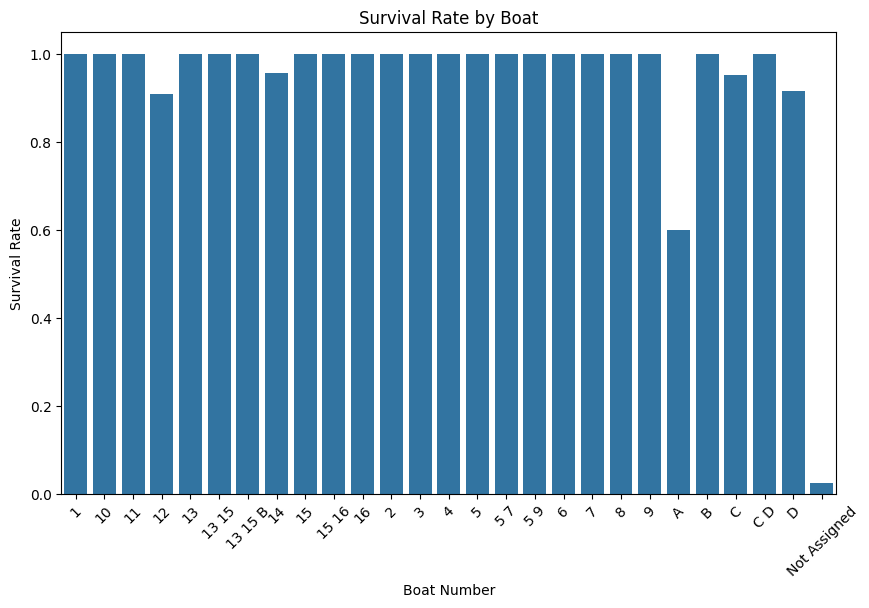

In [97]:
# Survival Rate by Boat
df['boat'] = df['boat'].astype('category')
boat_survival = df.groupby('boat')['survived'].mean().reset_index()
print(boat_survival)

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='boat', y='survived', data=boat_survival)
plt.title('Survival Rate by Boat')
plt.xlabel('Boat Number')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

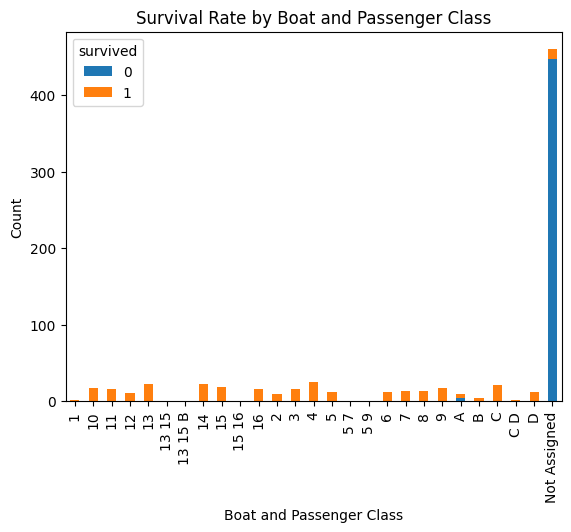

In [62]:

interaction_table = pd.crosstab([df['boat']], df['survived'])
interaction_table.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Boat and Passenger Class')
plt.xlabel('Boat and Passenger Class')
plt.ylabel('Count')
plt.show()


In [63]:
num_features=['age','fare']
cat_features=['pclass','sex','sibsp','parch','embarked','boat']

-- Age and fare are continuous numerical variables, meaning they can take a wide range of values and are not inherently grouped into categories.

-- Other columns like pclass, sex, sibsp, parch, and embarked represent discrete or categorical data. Categorical variables need to be encoded (e.g., one-hot encoding) to be used in machine learning models, as most models cannot handle raw categorical data.

# Check for multicollinearity - Correlation

In [64]:
df[num_features].corr()

,age,fare
age,1.000000,0.190967
fare,0.190967,1.000000


There is nothing like redundant features

# Check for zero varience

In [65]:
df[num_features].nunique()[df[num_features].nunique() == 1]

,0


Every feature provides useful info whereas cols with varience zero does not

# 3. Handling Null Values

In [66]:
df.isnull().sum()

,0
pclass,0
sex,0
age,113
sibsp,0
parch,0
fare,1
cabin,569
embarked,1
boat,0
survived,0


Finding the missing percentage of cols

In [67]:
df['age'].isnull().mean()*100

np.float64(14.888010540184455)

In [68]:
df['cabin'].isnull().mean()*100

np.float64(74.96706192358367)

# Creating Charts

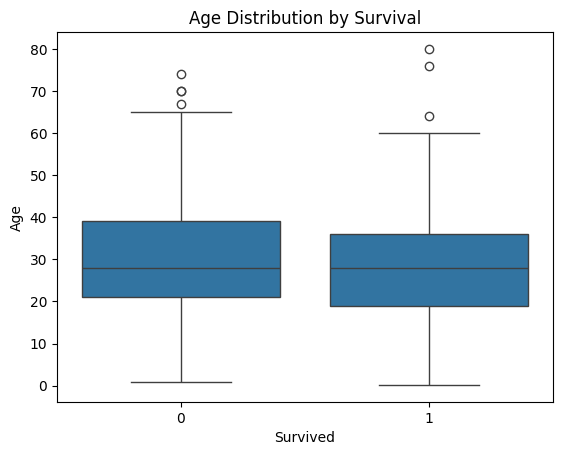

In [69]:
# sns.histplot(df['age'],df['survived'])
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

Here we can see that a little change in age (younger age) is more likely to survive
And also has a very low percentage of null Values,
so we will keep this column

Text(0.5, 1.0, 'Survival Rate by Cabin')

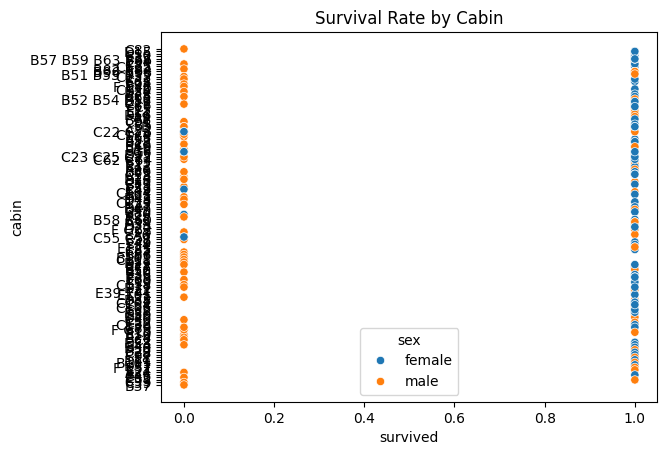

In [70]:
sns.scatterplot(x='survived',y='cabin',data=df,hue="sex")
plt.title('Survival Rate by Cabin')

cabin values are not effecting the survival of person,
In every cabin we can see survived and not survived values
So here we can REMOVE this col as it has many null values and no major insights for survival prediction.

# Feature Reduction

In [71]:
df.drop(columns=['cabin'],inplace=True)

In [72]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,boat,survived
0,3,female,NaN,0,0,7.7333,Q,13,1
1,3,male,38.0,0,0,8.6625,S,Not Assigned,0
2,3,female,30.0,1,1,24.1500,S,Not Assigned,0
3,2,female,54.0,1,3,23.0000,S,4,1
4,2,male,40.0,0,0,13.0000,S,Not Assigned,0
...,...,...,...,...,...,...,...,...,...
845,1,male,55.0,0,0,50.0000,S,Not Assigned,0
846,1,male,58.0,0,0,29.7000,C,Not Assigned,0
847,2,female,24.0,1,0,26.0000,S,12,1
848,3,female,3.0,1,1,13.7750,S,Not Assigned,0


## Splitting

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['survived']),df['survived'],test_size=0.2,random_state=42)

In [74]:
X_train.shape,X_test.shape

((607, 8), (152, 8))

In [75]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,boat
204,3,male,10.0,3,2,27.9000,S,Not Assigned
382,3,female,NaN,0,0,7.5500,S,Not Assigned
285,1,female,30.0,0,0,31.0000,C,4
91,3,male,24.0,0,0,7.8542,S,Not Assigned
510,3,female,26.0,1,1,22.0250,S,2
...,...,...,...,...,...,...,...,...
72,1,female,36.0,1,2,120.0000,S,4
107,3,male,NaN,1,0,14.4583,C,Not Assigned
290,3,female,20.0,0,0,7.8542,S,Not Assigned
475,2,male,NaN,0,0,12.8750,S,Not Assigned


# Imputation

In [76]:
for col in num_features:
  X_train[col]=X_train[col].fillna(X_train[col].median())
  X_test[col]=X_test[col].fillna(X_train[col].median())

In [77]:
for col in cat_features:
  X_train[col]=X_train[col].fillna(X_train[col].mode()[0])
  X_test[col]=X_test[col].fillna(X_train[col].mode()[0])

In [78]:
X_train['embarked'].isnull().sum()

np.int64(0)

# Handling Outlier

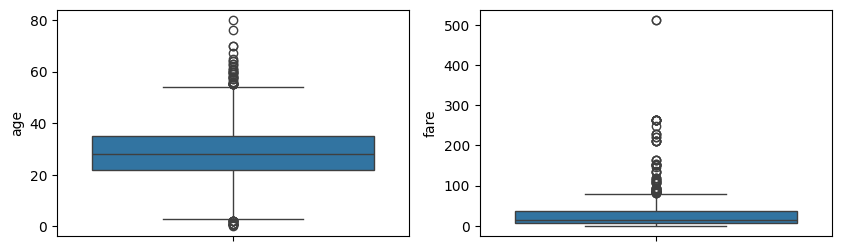

In [79]:
# Before removing outliers
fig=plt.figure(figsize=(10,10))
for i,col in enumerate(X_train[num_features]):
  plt.subplot(3,2,i+1)
  sns.boxplot(X_train[col])

In [80]:
from scipy.stats import skew
for i, col in enumerate(X_train[num_features]):
  print(col,":",skew(X_train[col]))

age : 0.5561129385257167
fare : 3.8675436906583793


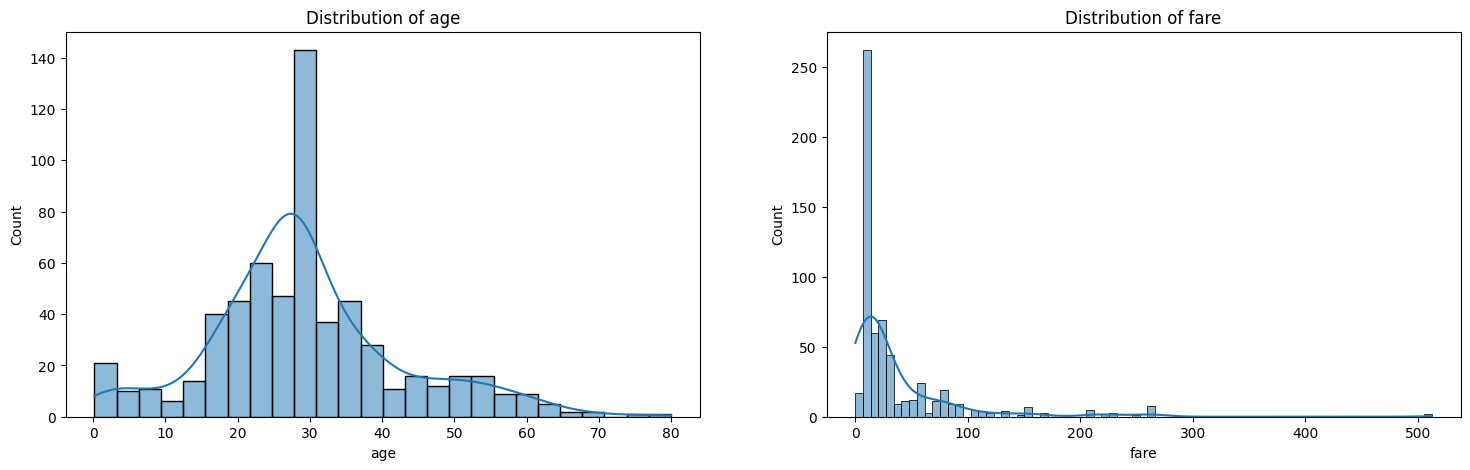

In [81]:
plt.figure(figsize=(18, 5))

# Create subplots for each numerical column
for i, col in enumerate(num_features):
    plt.subplot(1, len(num_features), i + 1)  # Adjust subplot grid as needed
    sns.histplot(X_train[col], kde =True)
    plt.title(f"Distribution of {col}")

plt.show()

In [82]:
for col in num_features:
  q1=X_train[col].quantile(0.25)
  q3=X_train[col].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  X_train[col]=np.where(
      X_train[col]>upper_limit,upper_limit,
      np.where(X_train[col]<lower_limit,lower_limit,
               X_train[col]))

In [83]:
# from scipy.stats.mstats import winsorize

# # Choose the desired percentile for winsorization (e.g., 5th and 95th percentiles)
# lower_limit = 0.05  # 5th percentile
# upper_limit = 0.95  # 95th percentile

# # Apply winsorization to numerical features
# for col in ['parch']:
#   X_train[col] = winsorize(X_train[col], limits=[lower_limit, upper_limit])

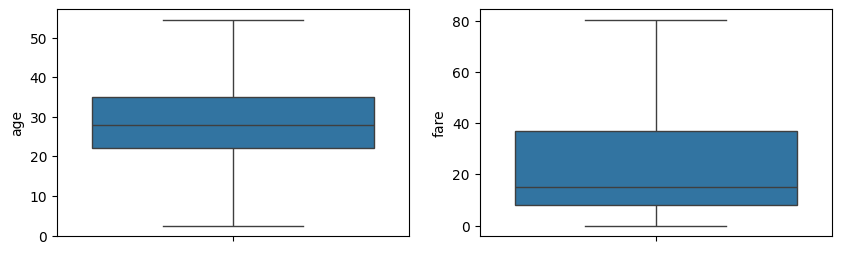

In [84]:
# After Outliers
fig=plt.figure(figsize=(10,10))
for i,col in enumerate(X_train[num_features]):
  plt.subplot(3,2,i+1)
  sns.boxplot(X_train[col])

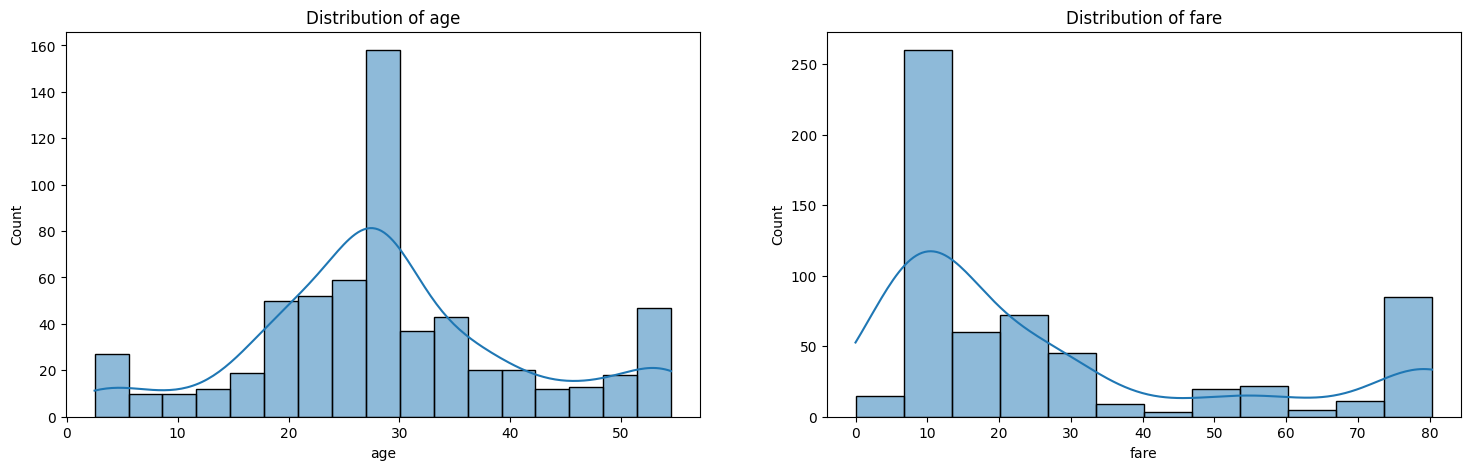

In [85]:
plt.figure(figsize=(18, 5))


for i, col in enumerate(X_train[num_features]):
    plt.subplot(1, len(num_features), i + 1)
    sns.histplot(X_train[col], kde =True)
    plt.title(f"Distribution of {col}")

plt.show()

In [86]:
from scipy.stats import skew
for i, col in enumerate(num_features):
  print(col,":",skew(X_train[col]))

age : 0.24895235068586338
fare : 1.1175084114280929


# Scaling

### Before Scaling

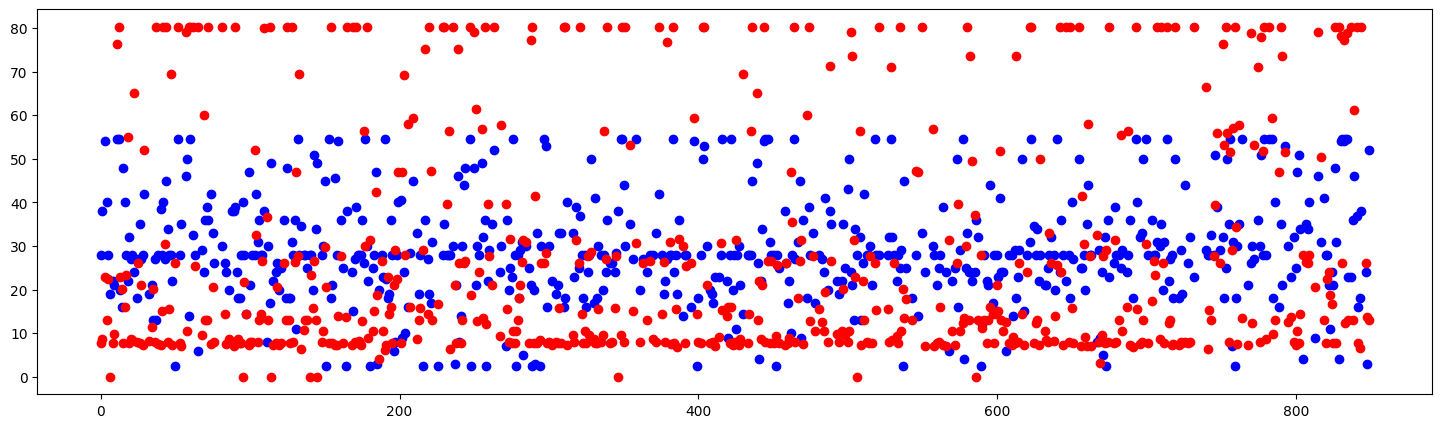

In [87]:
plt.figure(figsize=(18, 5))
for col,color in zip(['age','fare'],['blue','red']):
  plt.scatter(X_train.index,X_train[col],color=color)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### After Scaling

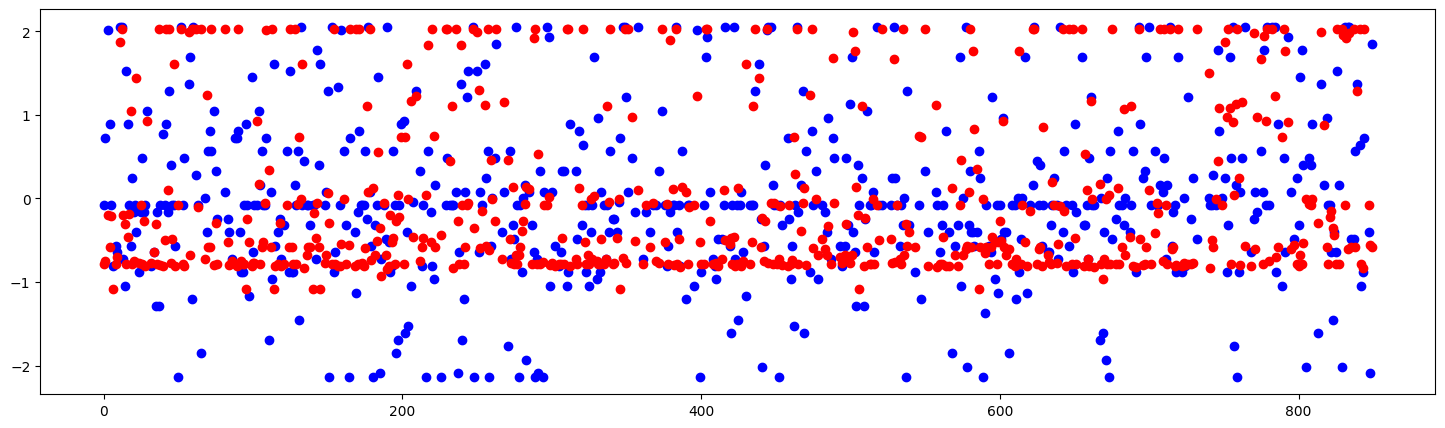

In [89]:
plt.figure(figsize=(18, 5))
for col,color in zip(['age','fare'],['blue','red']):
  plt.scatter(X_train.index,X_train[col],color=color)

# One Hot Encoding

In [92]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[cat_features])

encoded_train=ohe.transform(X_train[cat_features])
encoded_test=ohe.transform(X_test[cat_features])

columns=ohe.get_feature_names_out()

encoded_train_df=pd.DataFrame(encoded_train,columns=columns)
encoded_test_df=pd.DataFrame(encoded_test,columns=columns)

In [93]:
encoded_train_df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,boat_6,boat_7,boat_8,boat_9,boat_A,boat_B,boat_C,boat_C D,boat_D,boat_Not Assigned
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
604,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
605,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
encoded_test_df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,boat_6,boat_7,boat_8,boat_9,boat_A,boat_B,boat_C,boat_C D,boat_D,boat_Not Assigned
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
encoded_train_df.columns

Index(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male', 'sibsp_0',
       'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8',
       'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'parch_9', 'embarked_C', 'embarked_Q', 'embarked_S',
       'boat_1', 'boat_10', 'boat_11', 'boat_12', 'boat_13', 'boat_14',
       'boat_15', 'boat_15 16', 'boat_16', 'boat_2', 'boat_3', 'boat_4',
       'boat_5', 'boat_5 7', 'boat_5 9', 'boat_6', 'boat_7', 'boat_8',
       'boat_9', 'boat_A', 'boat_B', 'boat_C', 'boat_C D', 'boat_D',
       'boat_Not Assigned'],
      dtype='object')